# Random Forest Classification

## Content
- Processing Data
- RandomForestClassification: iteration1
- RandomForestClassification: other iterations
- Hyperparameter tuning
- Feature relevance


### Comments

- In a first iteration I used `test_size=0.3`, `n_estimators=30` and `max_depth=3`.

- in other iterations, I made RandomForestClassifiers(rfc) using the parameters in the parethesis and found these scores.

- The metrics Accuracy.F1score, recall and precision are found.

- The tuning the hyperparameters of the classifier with best performance shown the highest F1score and Recall.

- The order of importance among the columns found  was `distance`, `n_views`, `n_likes`, `item_available_timer`, `item_category`, `item_condition`, in descending order.

- Apply confusion matrix.

### Suggestions for metrics and methods to use further.
- Check the metrics Cross-validation and AUC-ROC
- Use also gridsearch to improve the metrics [source](https://www.mygreatlearning.com/blog/gridsearchcv/)
- Compare alternative models using Pycaret


### Definitions

Precision: measures the proportion of true positives among all positives. A high precision score indicates that the model is good at correctly predicting positive cases and minimizing false positives.

Recall (True positive rate): measures the proportion of true positives among all actual positive cases in the dataset. A high recall score indicates that the model is good at identifying all positive cases and minimizing false negatives.

**Q1. Comment on precision vs recall.**
A. Precision is a metric that measures the accuracy of positive predictions. It is the number of true positive predictions divided by the number of true positive predictions plus false positive predictions.

Recall, on the other hand, measures the completeness of positive predictions. It is the number of true positive predictions divided by the number of true positive predictions plus false negative predictions.

**Q2. What is the difference between precision and accuracy?**
A. Accuracy is the fraction of correct predictions made by a classifier over all the instances in the test set. On the other hand, precision is a metric that measures the accuracy of positive predictions.




max_depth: 3,5,7 (or 9)
max_features(default)

TODO:
- Format columns as Felipe did: 
```timedate_creation": "2023-03-29T17:33:41.468400+02:00",         "item_age": "0 days, 0 hours, 32 minutes"``   

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
# import graphviz

from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.metrics import f1_score

from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [100]:
data= pd.read_csv('data/ml_class_df.csv',index_col=None)
item_data = data
item_data.head()

,item_category,item_condition,item_postcode,item_available_timer,distance,n_views,n_likes,item_available,item_id
0,furniture,poor,13125,13,26541,803,48,0,1
1,kids,like_new,13357,75,14931,211,40,1,2
2,furniture,like_new,13509,33,28823,1521,288,0,3
3,kids,poor,12437,36,23307,1968,196,0,4
4,kitchen_utensils,like_new,10243,17,17672,294,0,0,5


#### Features:

- item_category
- item_condition
- item_postcode
- item_available_timer in hours
- distance (item-user in meters)
- n_views
- n_likes
- item_available = y -> if the item is still available (this is what we’re trying to predict)

In [101]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   item_category         5000 non-null   object
 1   item_condition        5000 non-null   object
 2   item_postcode         5000 non-null   int64 
 3   item_available_timer  5000 non-null   int64 
 4   distance              5000 non-null   int64 
 5   n_views               5000 non-null   int64 
 6   n_likes               5000 non-null   int64 
 7   item_available        5000 non-null   int64 
 8   item_id               5000 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 351.7+ KB


In [102]:
categorical_vars = [ 'item_category', 'item_condition', 'item_postcode', 'item_available']

## Preprocessing Data

In [103]:
# item_data['item_postcode'] = pd.to_numeric(item_data['item_postcode'])
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   item_category         5000 non-null   object
 1   item_condition        5000 non-null   object
 2   item_postcode         5000 non-null   int64 
 3   item_available_timer  5000 non-null   int64 
 4   distance              5000 non-null   int64 
 5   n_views               5000 non-null   int64 
 6   n_likes               5000 non-null   int64 
 7   item_available        5000 non-null   int64 
 8   item_id               5000 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 351.7+ KB


In [104]:
print(pd.unique(item_data['item_postcode']))
print(len(pd.unique(item_data['item_postcode'])))

[13125 13357 13509 12437 10243 10709 12359 12163 12043 10437 12439 12105
 13359 12157 13086 14195 12109 12435 12203 12059 12161 14193 14059 12349
 12209 12277 12629 13189 12679 10369 12347 13469 10707 13505 13627 13051
 14199 13347 13583 10779 10365 10967 12353 12165 10553 10719 12559 13355
 12205 13407 14163 12687 12526 10715 10711 13507 13156 12681 14197 13055
 14169 13595 10829 10405 12489 14109 13435 12351 12307 12051 12627 10713
 13349 12685 13589 10178 10317 13593 12619 10789 12589 10589 12053 12689
 10559 12249 13129 10407 10783 12683 10435 12587 10319 13591 13403 12047
 14050 12524 10623 10551 10247 12099 13159 13467 12167 10785 10409 14089
 12107 12045 12357 10587 10318 10781 10119 13409 12169 13599 12355 14165
 13405 10249 10245 13503 13059 12555 12049 14055 13629 10315 12207 13581
 10439 13088 12459 13127 14057 12159 12055 13089 12527 10961 12305 13587
 10627 12621 14129 10997 12247 10179 10969 12057 13353 10625 13158 10367
 13053 10823 13465 12103 12309 13439 10827 12101 13

In [105]:
# I am going to drop postcodes because it has too many unique items
item_data = item_data.drop('item_postcode', axis=1)
item_data.head()

,item_category,item_condition,item_available_timer,distance,n_views,n_likes,item_available,item_id
0,furniture,poor,13,26541,803,48,0,1
1,kids,like_new,75,14931,211,40,1,2
2,furniture,like_new,33,28823,1521,288,0,3
3,kids,poor,36,23307,1968,196,0,4
4,kitchen_utensils,like_new,17,17672,294,0,0,5


In [106]:
item_data.columns

Index(['item_category', 'item_condition', 'item_available_timer', 'distance',
       'n_views', 'n_likes', 'item_available', 'item_id'],
      dtype='object')

In [107]:
item_data['item_available'].unique()

array([0, 1])

In [108]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   item_category         5000 non-null   object
 1   item_condition        5000 non-null   object
 2   item_available_timer  5000 non-null   int64 
 3   distance              5000 non-null   int64 
 4   n_views               5000 non-null   int64 
 5   n_likes               5000 non-null   int64 
 6   item_available        5000 non-null   int64 
 7   item_id               5000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 312.6+ KB


### Encoding

In [109]:
# item_category = ['furniture',  'clothes',  'kitchen_utensils', 'kids', 'other'] 
# item_condition = ['poor', 'acceptable', 'good', 'like_new']
# item_available = ['yes', 'no']

In [110]:
# encoding

item_data['item_available'] = item_data['item_available'].replace('no', 0).replace('yes', 1)
item_data['item_category'] = item_data['item_category'].replace('furniture', 1).replace('clothes', 2).replace('kitchen_utensils', 3).replace('kids', 4).replace('other', 5)
item_data['item_condition'] = item_data['item_condition'].replace('like_new', 1).replace('good', 2).replace('acceptable', 3).replace('poor', 4)

item_data.head()


,item_category,item_condition,item_available_timer,distance,n_views,n_likes,item_available,item_id
0,1,4,13,26541,803,48,0,1
1,4,1,75,14931,211,40,1,2
2,1,1,33,28823,1521,288,0,3
3,4,4,36,23307,1968,196,0,4
4,3,1,17,17672,294,0,0,5


In [111]:
item_data = item_data.drop('item_id', axis=1)

In [112]:
# item_data = item_data.drop('search_id', axis=1)

item_data.head()

,item_category,item_condition,item_available_timer,distance,n_views,n_likes,item_available
0,1,4,13,26541,803,48,0
1,4,1,75,14931,211,40,1
2,1,1,33,28823,1521,288,0
3,4,4,36,23307,1968,196,0
4,3,1,17,17672,294,0,0


In [113]:
item_data_encoded = item_data.to_csv("data/item_data_encoded.csv", index=False)

## Splitting the Data

In [114]:
# Split the data into features (X) and target (y)
X = item_data.drop(['item_available'], axis=1)
y = item_data['item_available']

In [115]:
print(y)

0       0
1       1
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: item_available, Length: 5000, dtype: int64


In [116]:
print(X)

      item_category  item_condition  item_available_timer  distance  n_views  \
0                 1               4                    13     26541      803   
1                 4               1                    75     14931      211   
2                 1               1                    33     28823     1521   
3                 4               4                    36     23307     1968   
4                 3               1                    17     17672      294   
...             ...             ...                   ...       ...      ...   
4995              2               4                    58     14727      200   
4996              1               1                    12     21712     1521   
4997              1               2                    88       321     1452   
4998              1               2                    74      1036     1210   
4999              1               3                    12     22856     1653   

      n_likes  
0          48  
1      

In [117]:
# from sklearn.model_selection import train_test_split

# SEED = 42
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     test_size=0.2, 
#                                                     random_state=SEED)

# SEED = 42
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     test_size=0.3, 
#                                                     random_state=SEED)

### Iteration 1

In [118]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [119]:
# from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=30, 
                             max_depth=3,
                             oob_score = True)
# ,
#                              random_state=SEED)
# oob_score = True

In [120]:
# Fit RandomForestClassifier
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=523675176)


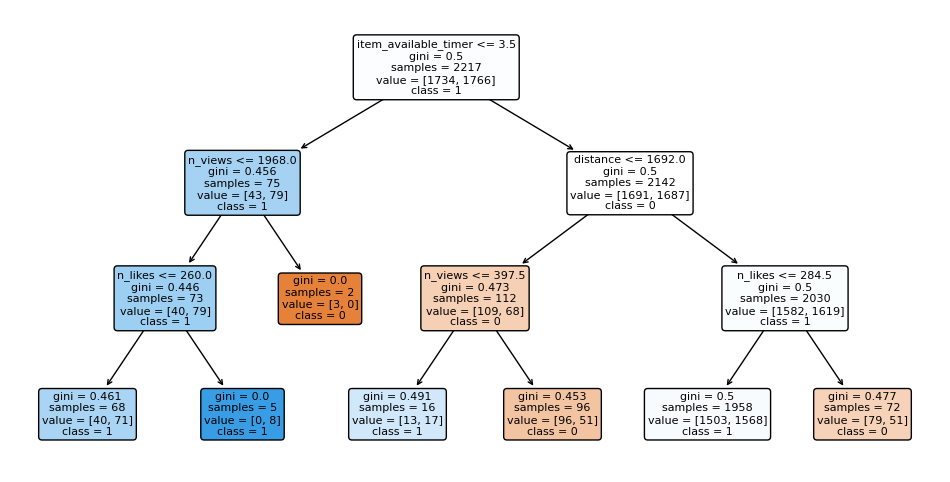

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=878089004)


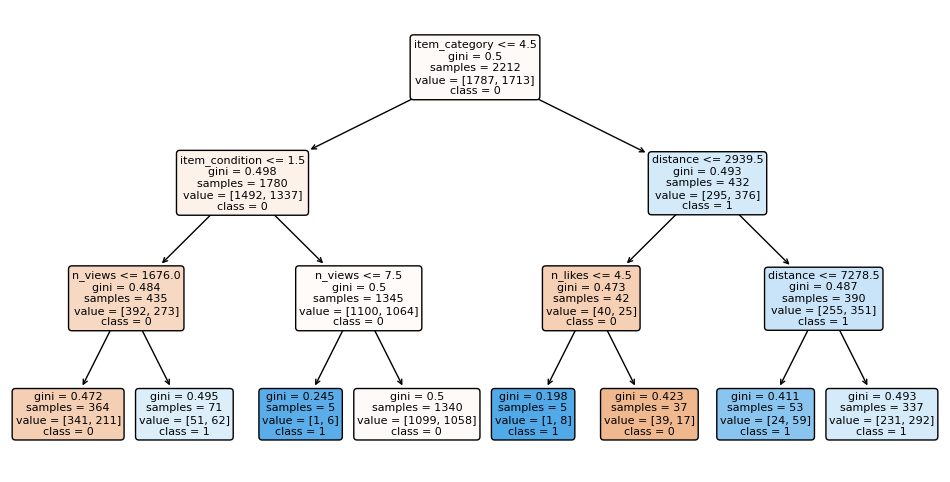

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=2112865818)


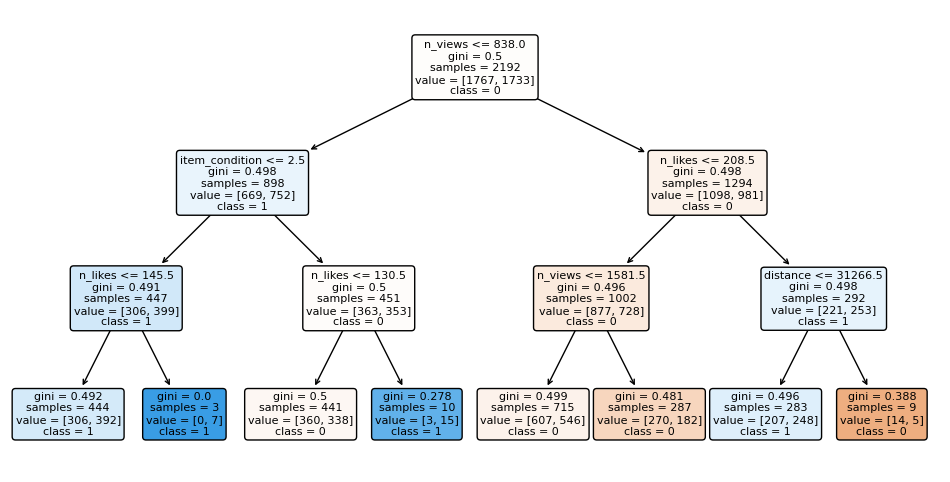

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=561478591)


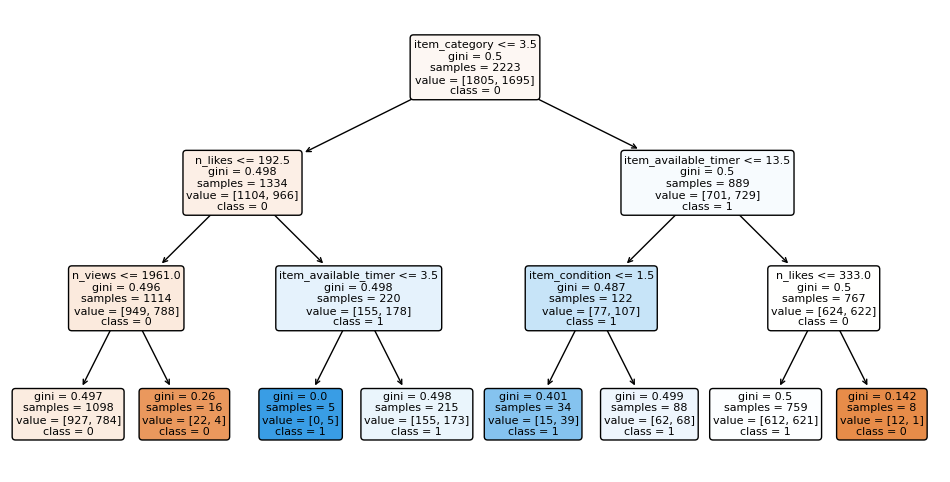

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=794739101)


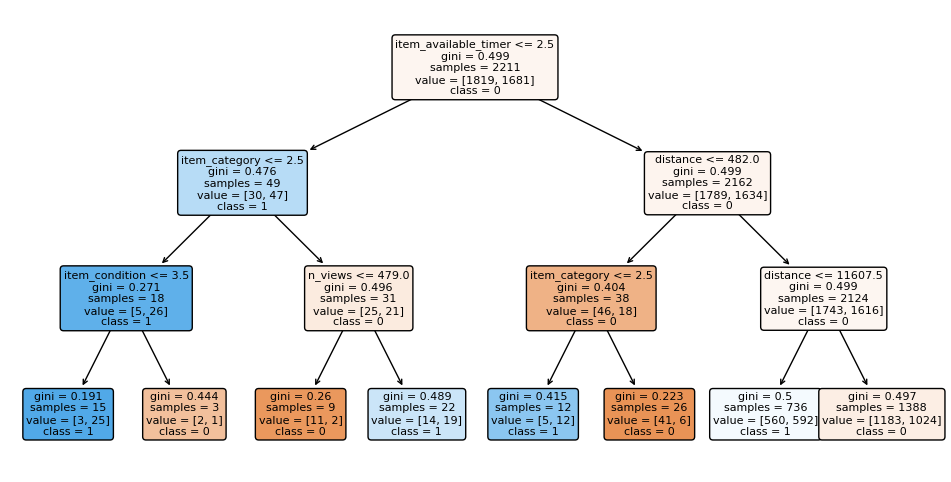

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1523793245)


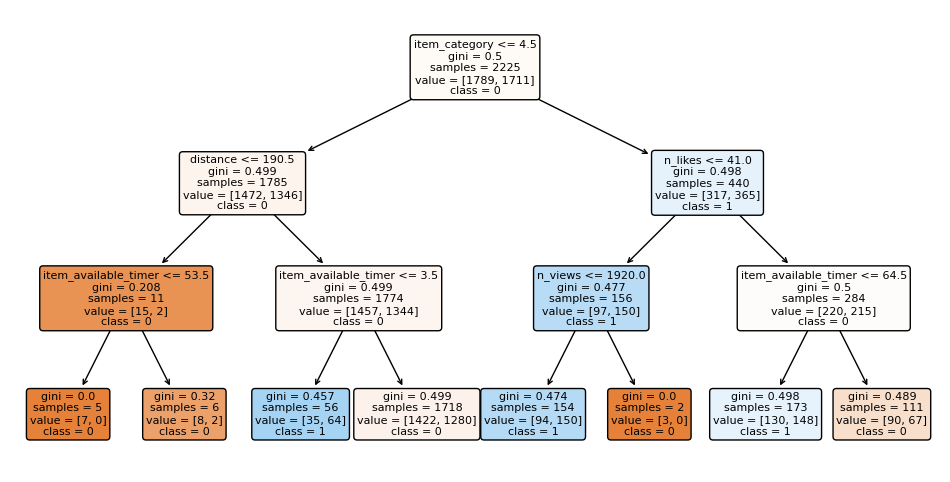

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1457559118)


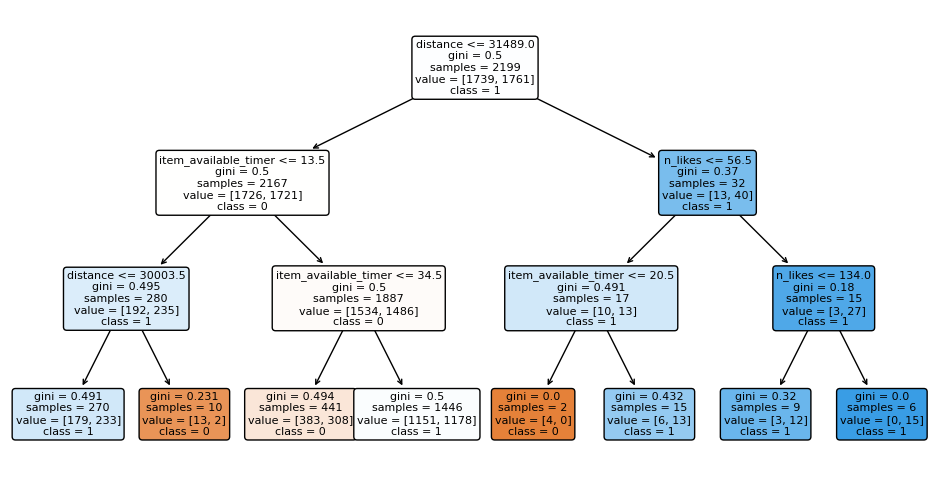

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=619382143)


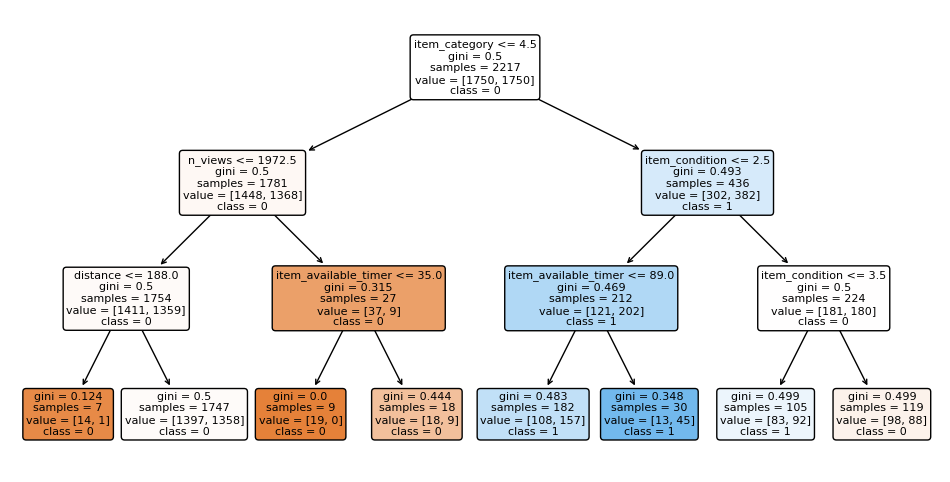

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=175477300)


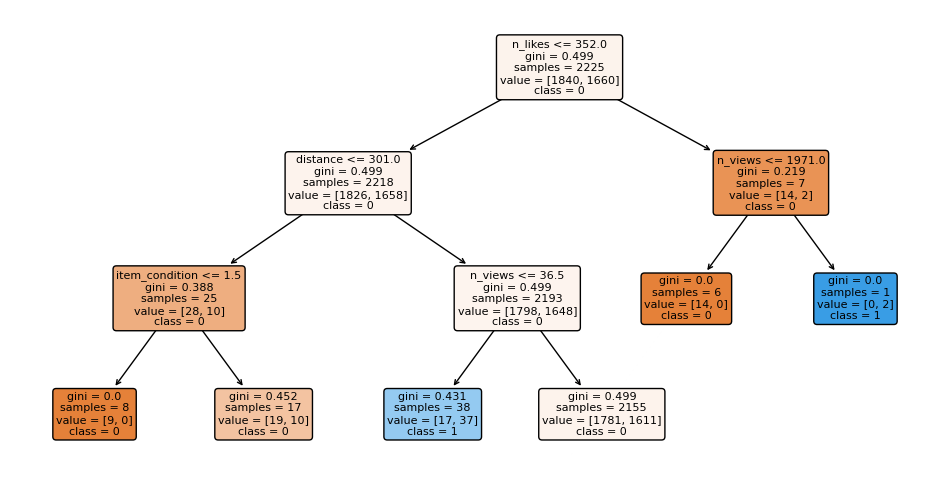

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1724750139)


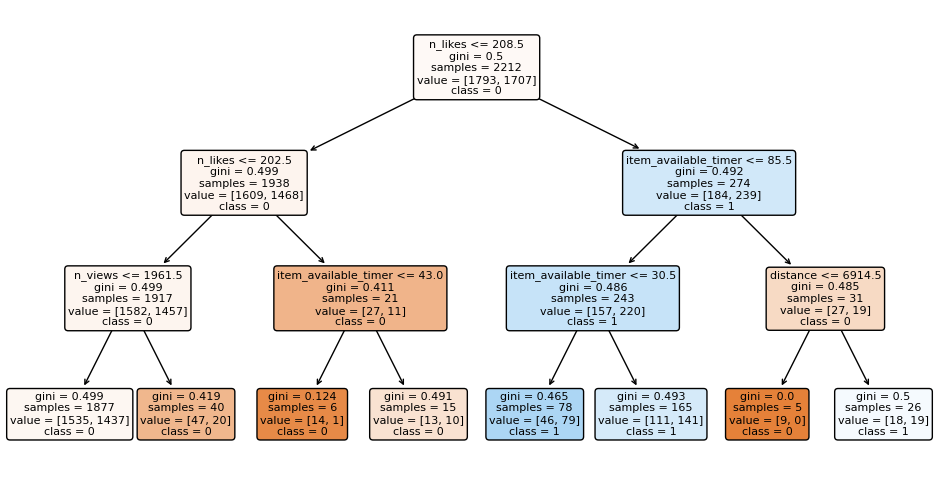

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=410787520)


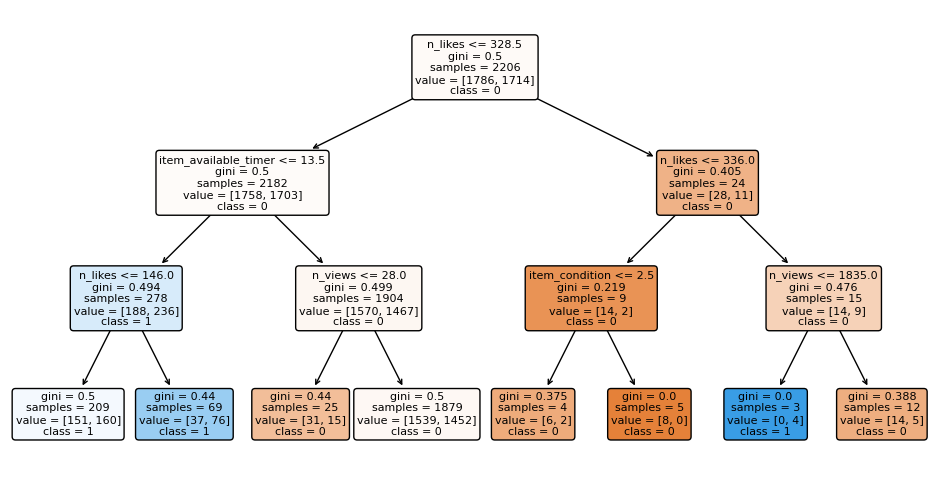

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=355023114)


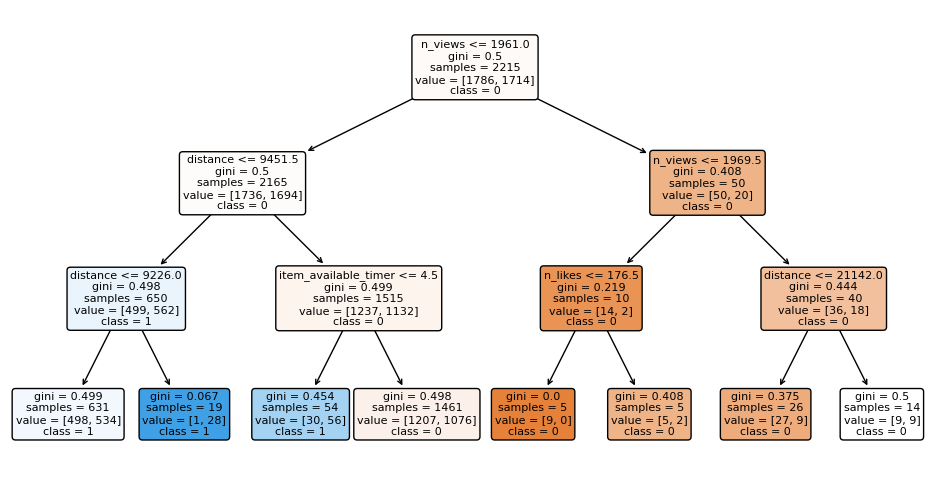

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=116620344)


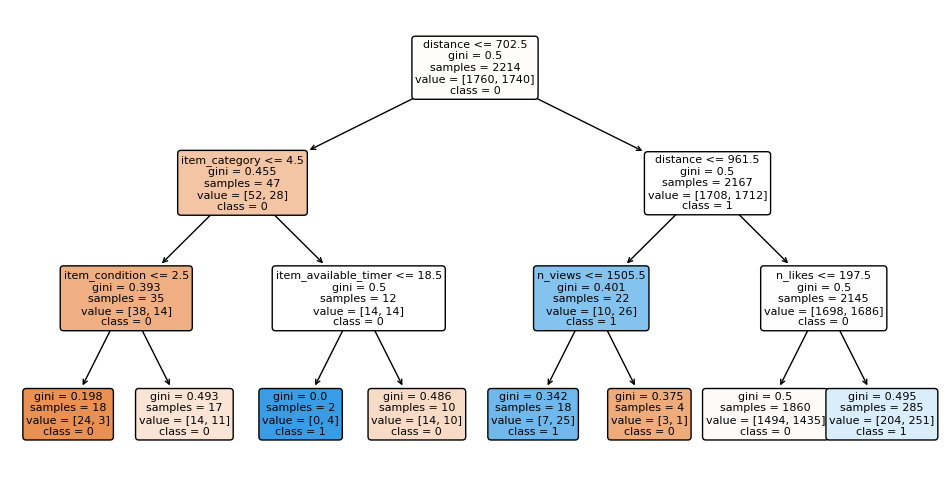

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1143705759)


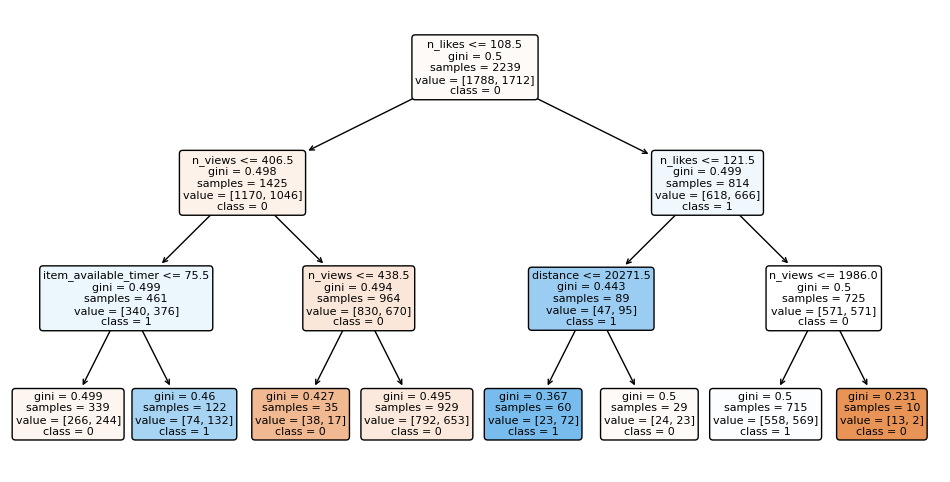

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1630106324)


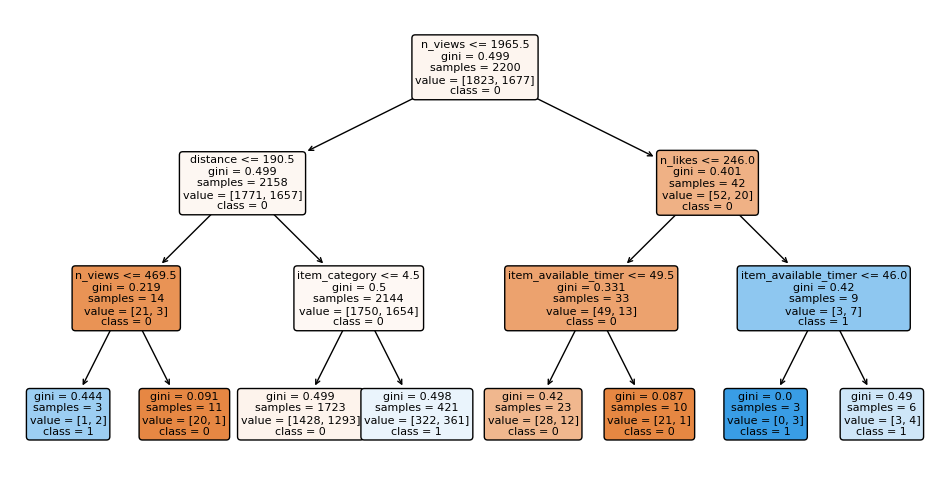

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=960138248)


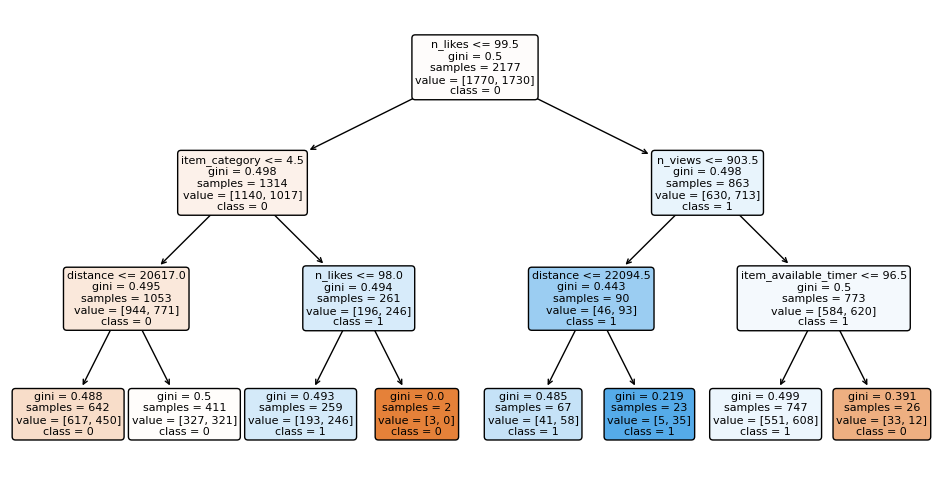

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1938106677)


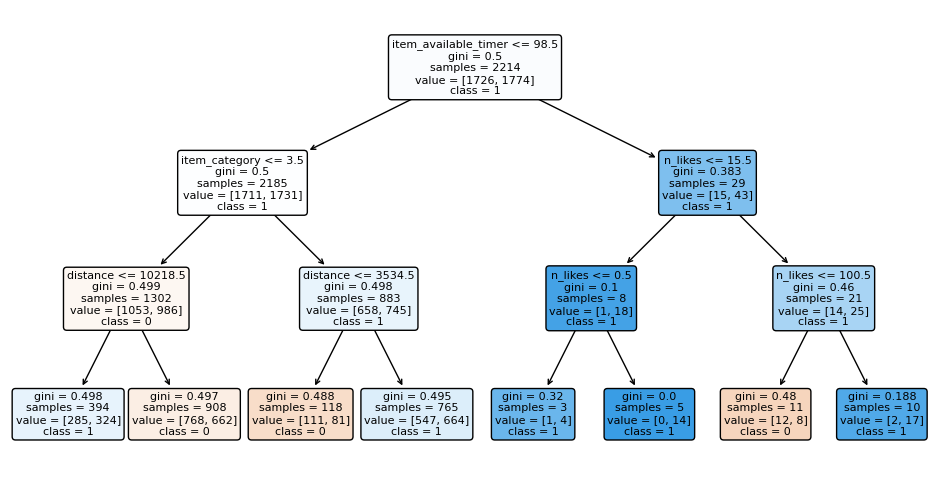

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=787982597)


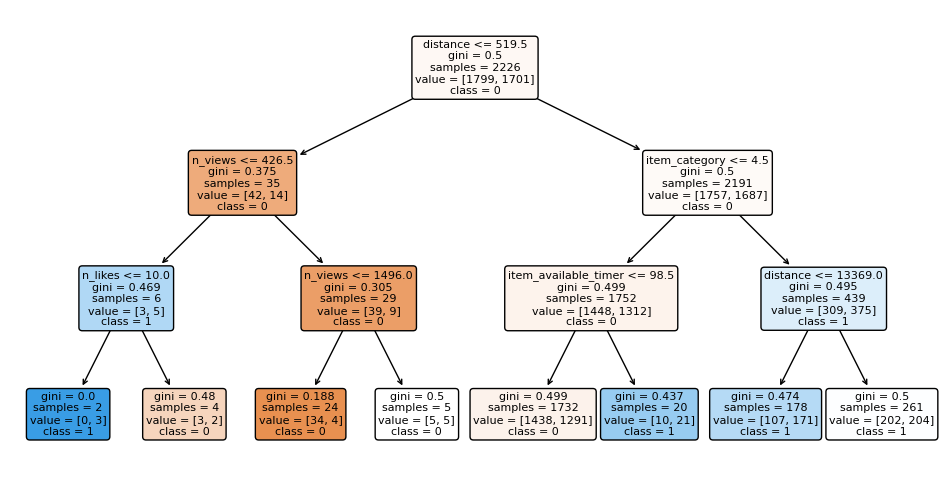

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1796697817)


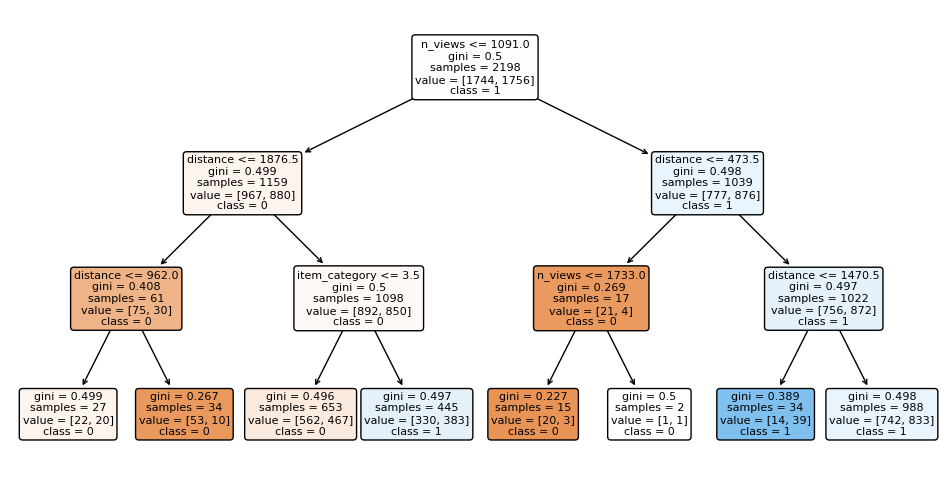

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=591252547)


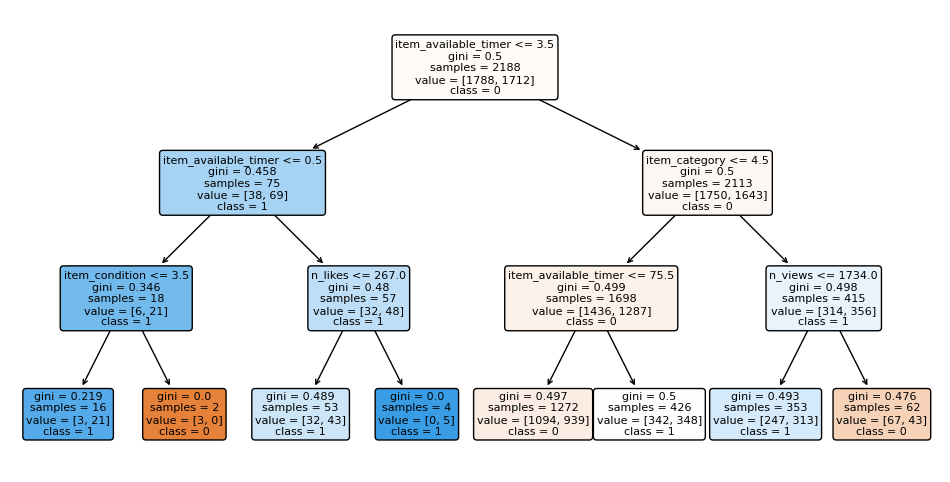

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=2086112763)


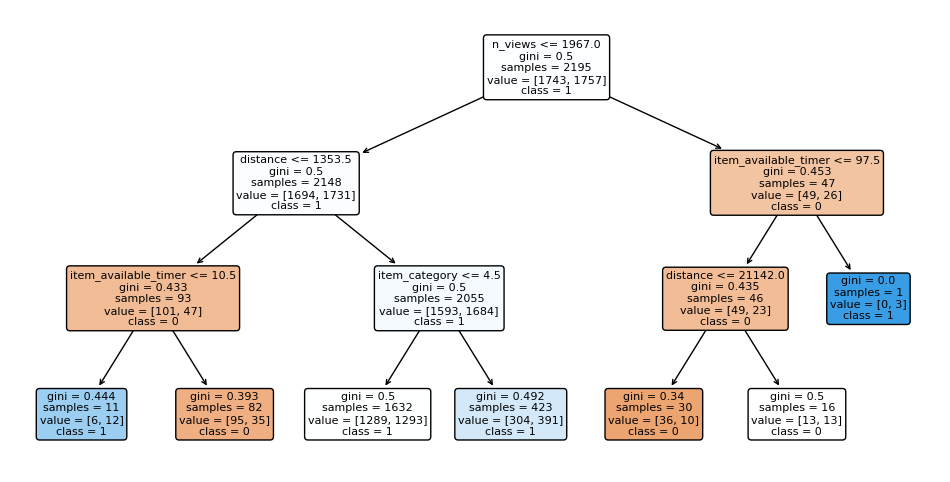

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=124601863)


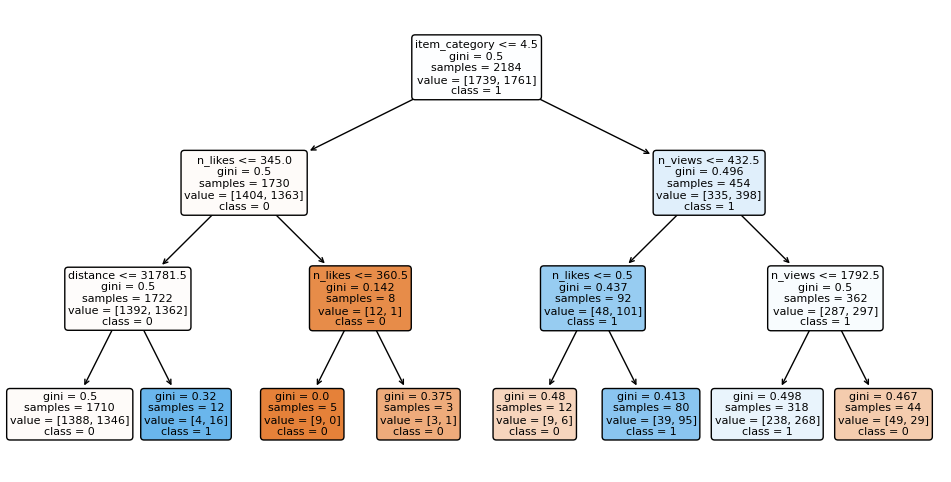

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1125210105)


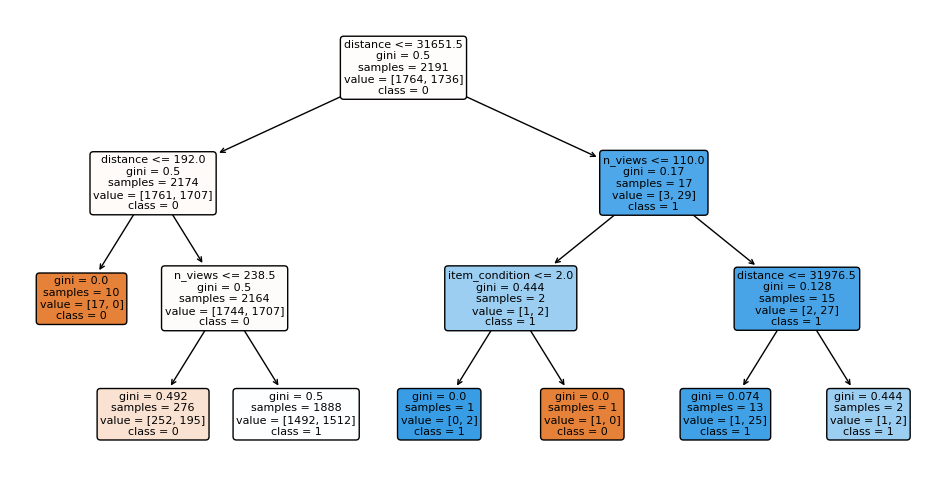

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=2080255799)


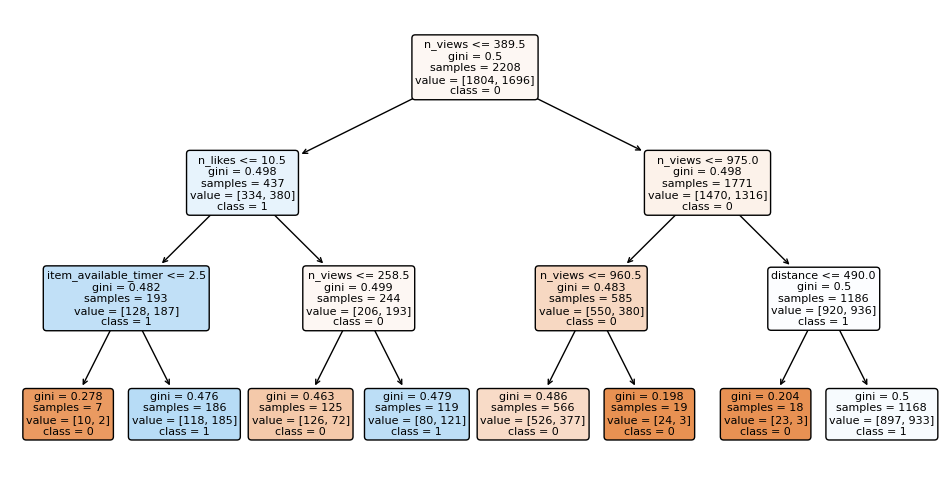

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=929649443)


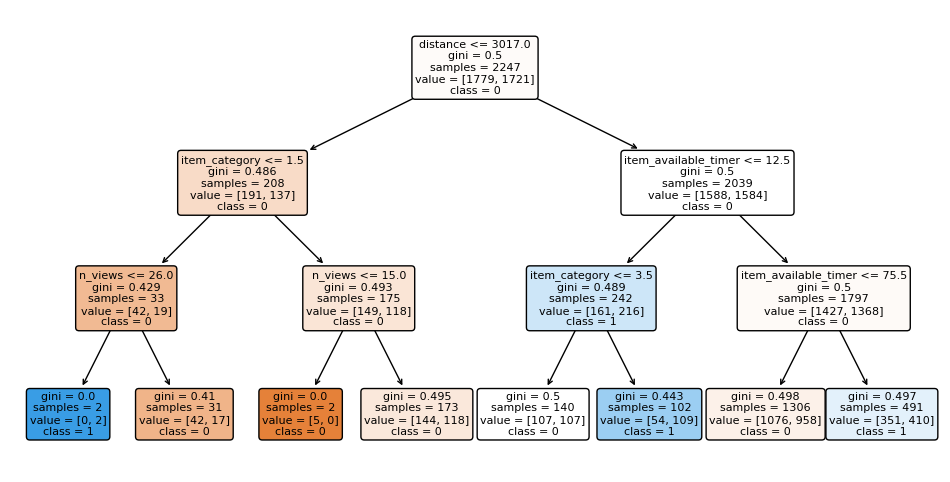

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=784435316)


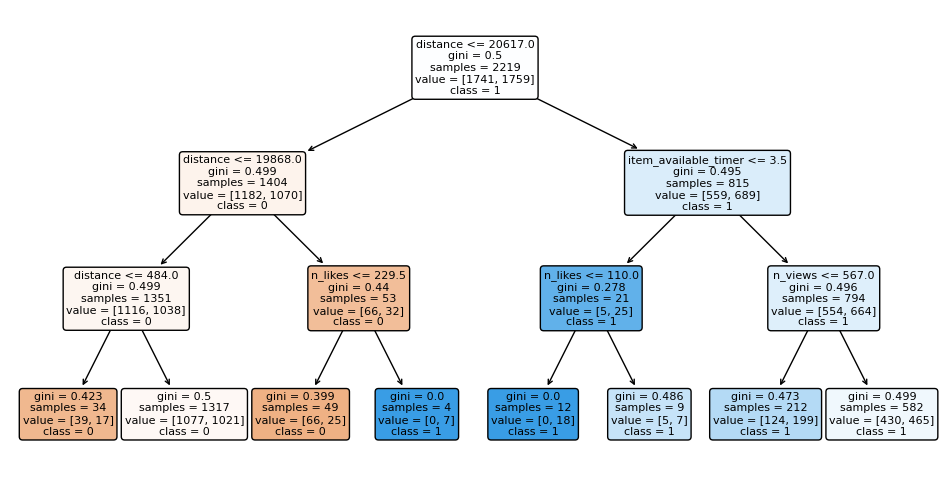

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1341991055)


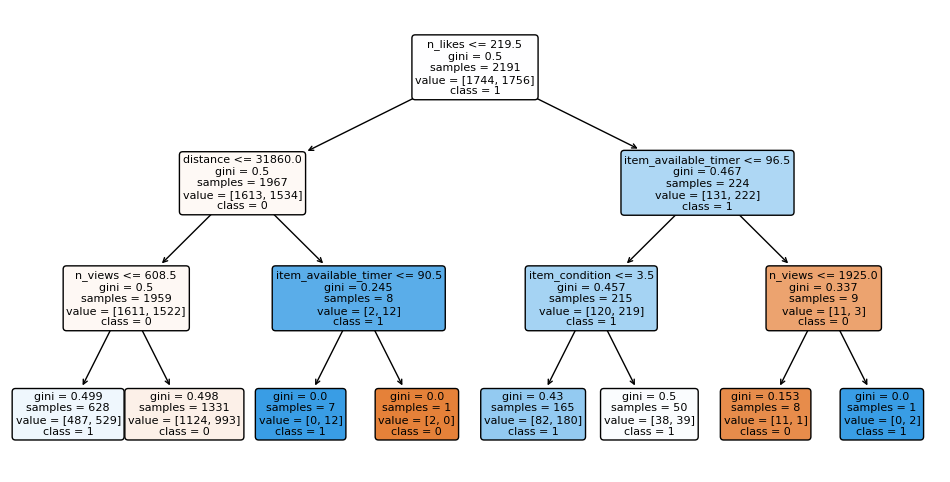

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=853999795)


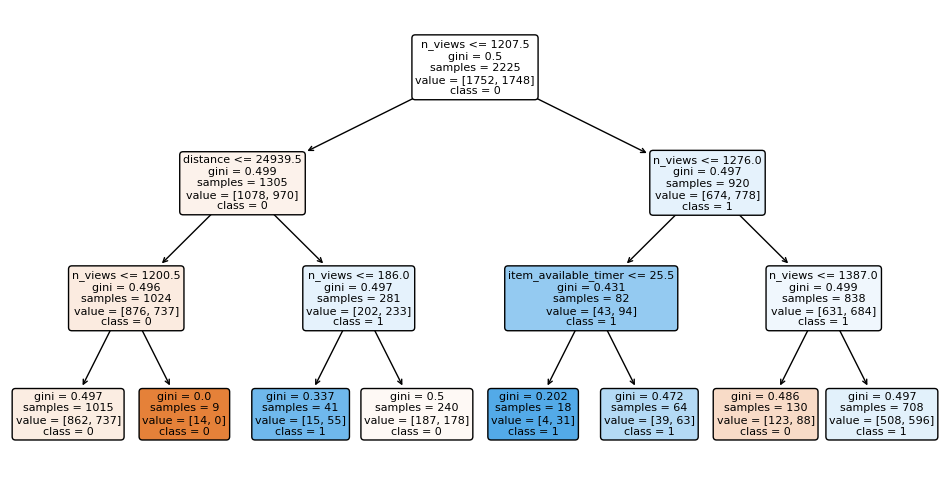

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=925552777)


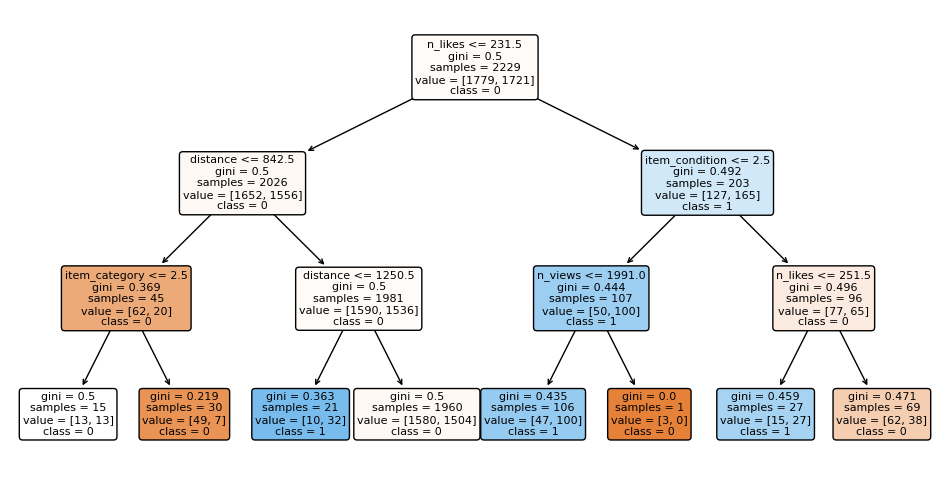

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=732224144)


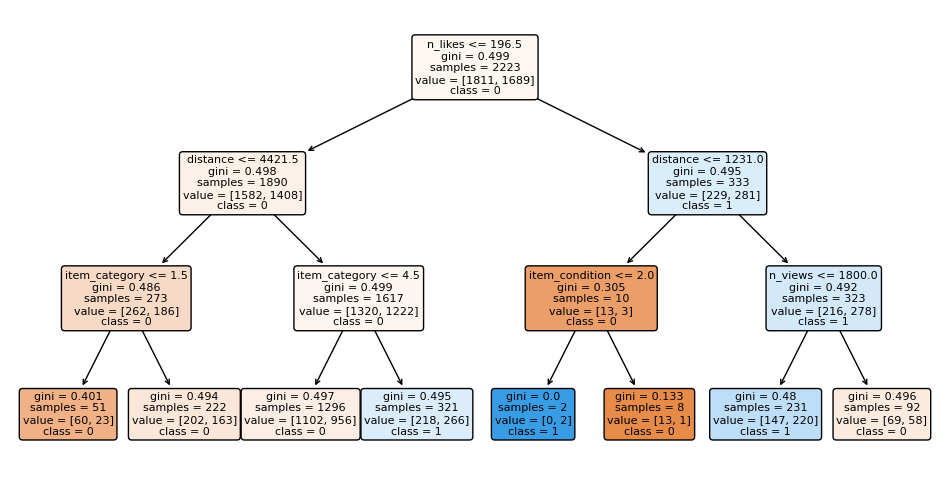

In [121]:
# plot the tree
features = X.columns.values # The name of each column
classes = ['0', '1'] # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['no', 'yes']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

In [122]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1score:', f1_score(y_test, y_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))


print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))
 


Accuracy: 0.5006666666666667
F1score: 0.3835390946502058
Precision:  0.492600422832981
Recall:  0.3140161725067385


### Other iterations

In [123]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [124]:
rfc = RandomForestClassifier(n_estimators=10, 
                             max_depth=1)
#                              ,
#                              random_state=SEED)

In [125]:
# Fit RandomForestClassifier
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)

In [126]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1score:', f1_score(y_test, y_pred))

Accuracy: 0.49533333333333335
F1score: 0.45734767025089607


In [127]:
SEED=100
def rfc(test_size,n_estimators,max_depth):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    rfc = RandomForestClassifier(n_estimators=n_estimators, 
                             max_depth=max_depth,
                             random_state=SEED)
    # Fit RandomForestClassifier
    rfc.fit(X_train, y_train)
    # Predict the test set labels
    y_pred = rfc.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('F1score:', f1_score(y_test, y_pred))
    print('Precision: ',precision_score(y_test, y_pred))
    print('Recall: ',recall_score(y_test, y_pred))
    
    

In [128]:
rfc(.2,2,3)

Accuracy: 0.511
F1score: 0.4462061155152888
Precision:  0.5130208333333334
Recall:  0.39478957915831664


In [129]:
rfc(.3,80,5) 

Accuracy: 0.5026666666666667
F1score: 0.3741610738255034
Precision:  0.5068181818181818
Recall:  0.29654255319148937


In [130]:
rfc(.3,3,7)

Accuracy: 0.5073333333333333
F1score: 0.5366771159874609
Precision:  0.49941656942823803
Recall:  0.5799457994579946


In [131]:
rfc(.2,50,7)

Accuracy: 0.51
F1score: 0.44570135746606326
Precision:  0.49873417721518987
Recall:  0.40286298568507156


In [132]:
rfc(.2,95,9)

Accuracy: 0.508
F1score: 0.41843971631205673
Precision:  0.5028409090909091
Recall:  0.3582995951417004


### Tuning hyperparameters

In [133]:
from sklearn.model_selection import RandomizedSearchCV as RSCV

param_grid = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [3, 5, 7, 9],
              'max_samples': [0.3, 0.5, 0.8]}

model = RSCV(RandomForestClassifier(), param_grid, n_iter = 15).fit(X_train, y_train)
model = model.best_estimator_

In [134]:
model

RandomForestClassifier(max_depth=3, max_features=0.30000000000000004,
                       max_samples=0.3, n_estimators=50)

In [135]:
model.fit(X, y)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print(indices)
print(item_data.columns[indices])

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]): # X.shape[1] is the number of columns
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
print('Accuracy:', accuracy_score(y_test,y_pred))
print('F1score:', f1_score(y_test, y_pred))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))
    


[3 4 5 2 0 1]
Index(['distance', 'n_views', 'n_likes', 'item_available_timer',
       'item_category', 'item_condition'],
      dtype='object')
Feature ranking:
1. feature 3 (0.211139)
2. feature 4 (0.196855)
3. feature 5 (0.190486)
4. feature 2 (0.161202)
5. feature 0 (0.131235)
6. feature 1 (0.109083)
Accuracy: 0.49533333333333335
F1score: 0.45734767025089607
Precision:  0.4636627906976744
Recall:  0.4512022630834512


The tuned model had the higher F1score and Recall.

In [136]:
from sklearn.metrics import confusion_matrix

In [137]:
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[424 369]
 [388 319]]


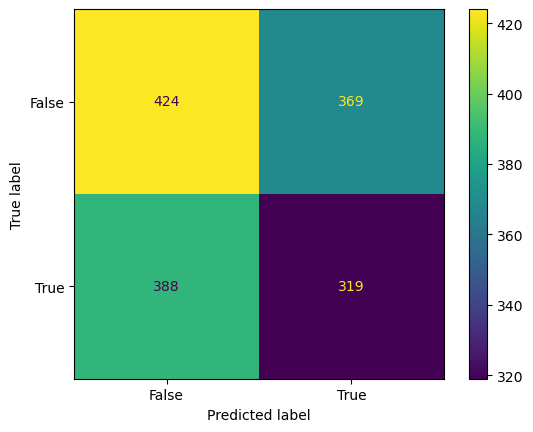

In [138]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [139]:
new_data = pd.read_csv('data/new_data.csv',index_col=None)
new_data.head()

,item_category,item_condition,item_available_timer,distance,n_views,n_likes
0,4,1,55,20855,479,67
1,5,3,35,6853,1154,23
2,3,4,57,5860,1230,159
3,5,2,40,23480,1124,112
4,3,3,61,19813,1577,126


In [140]:
# new_data = new_data[['item_category','item_condition','item_available_timer','distance','n_views','n_likes']]

In [141]:
# new_data = new_data.drop('Unnamed: 6', axis=1)

# new_data.head()

In [142]:
# # encoding
# new_data_encoded = new_data

# new_data_encoded['item_category'] = new_data_encoded['item_category'].replace('furniture', 1).replace('clothes', 2).replace('kitchen_utensils', 3).replace('kids', 4).replace('other', 5)
# new_data_encoded['item_condition'] = new_data_encoded['item_condition'].replace('like_new', 1).replace('good', 2).replace('acceptable', 3).replace('poor', 4)

# new_data_encoded.head()

In [143]:
predictions = model.predict(new_data)
predictions

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [144]:
pred_series = pd.Series(predictions, name='prediction')

In [145]:
new_data = pd.concat([new_data, pred_series], axis=1)

In [146]:
new_data

,item_category,item_condition,item_available_timer,distance,n_views,n_likes,prediction
0,4,1,55,20855,479,67,0
1,5,3,35,6853,1154,23,0
2,3,4,57,5860,1230,159,0
3,5,2,40,23480,1124,112,1
4,3,3,61,19813,1577,126,0
5,1,4,0,15756,1352,175,1
6,2,4,96,26892,1454,0,0
7,5,4,88,15098,224,8,0
8,3,3,19,4624,688,75,0
9,5,2,39,17810,1140,114,1


#### References:
- https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/
- https://towardsdatascience.com/random-forest-classification-678e551462f5
- https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/?
- https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597
- https://postal-codes.cybo.com/germany/berlin/
- https://towardsdatascience.com/mastering-random-forests-a-comprehensive-guide-51307c129cb1
- https://github.com/KC2016/developing_tech_skills/blob/main/DataScience_WWCode/Intro_to_MachineLearning/2_Classification_Bayes.ipynb

In [147]:
#     param_grid = {'n_estimators':np.arange(50,200,15),
#                 'max_features':np.arange(0.1, 1, 0.1),
#                 'max_depth': [3, 5, 7, 9],
#                 'max_samples': [0.3, 0.5, 0.8]}

#     model = RSCV(RandomForestClassifier(), param_grid, n_iter = 15).fit(X_train, y_train)
#     model = model.best_estimator_
#     model.fit(X, y)
#     importances = model.feature_importances_
#     std = np.std([tree.feature_importances_ for tree in model.estimators_],
#              axis=0)
#     indices = np.argsort(importances)[::-1]

#     print(indices)
#     print(item_data.columns[indices])

#     # Print the feature ranking
#     print("Feature ranking:")

#     for f in range(X.shape[1]): # X.shape[1] is the number of columns
#         print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
#     print('Accuracy:', accuracy_score(y_test, y_pred))
#     print('F1score:', f1_score(y_test, y_pred))
#     print('Precision: ',precision_score(y_test, y_pred))
#     print('Recall: ',recall_score(y_test, y_pred))